In [ ]:
#EDA
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_tree

#Model Preparation & Prediction
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("//content//heart.csv")

# Dataset Context

This data set dates from *1988* and consists of *four* databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains **76** attributes, including the predicted attribute, but all published experiments refer to using a subset of **14** of them.

**NOTE:** The **"target"** field refers to *the presence of heart disease in the patient*. It is integer valued **0** = *no disease* and **1** = *disease*.

## Attribute Information

1. **age**

2. **sex** = = 1: male; 0: female

3. **cp** = chest pain type (4 values)

4. **trestbps** =  resting blood pressure

5. **chol** = serum cholestoral in mg/dl

6. **fbs** = fasting blood sugar > 120 mg/dl

7. **restecg** = resting electrocardiographic results (values 0,1,2)

8. **thalach** = maximum heart rate achieved

9. **exang** = exercise induced angina

10. **oldpeak** = ST depression induced by exercise relative to rest

11. **slope** = the slope of the peak exercise ST segment

12. **ca** = number of major vessels (0-3) colored by flourosopy

13. **thal** = 0: normal; 1: fixed defect; 2: reversable defect.

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Outlier Handling

In [ ]:
def outlier_detector(data, thresh=3):
    outliers = []
    mean = np.mean(data)
    sd = np.std(data)
    for i in data:
        z_score = (i - mean) / sd
        if np.abs(z_score) > thresh:
            outliers.append(i)
    return outliers

In [ ]:
cols = df.columns.to_list()

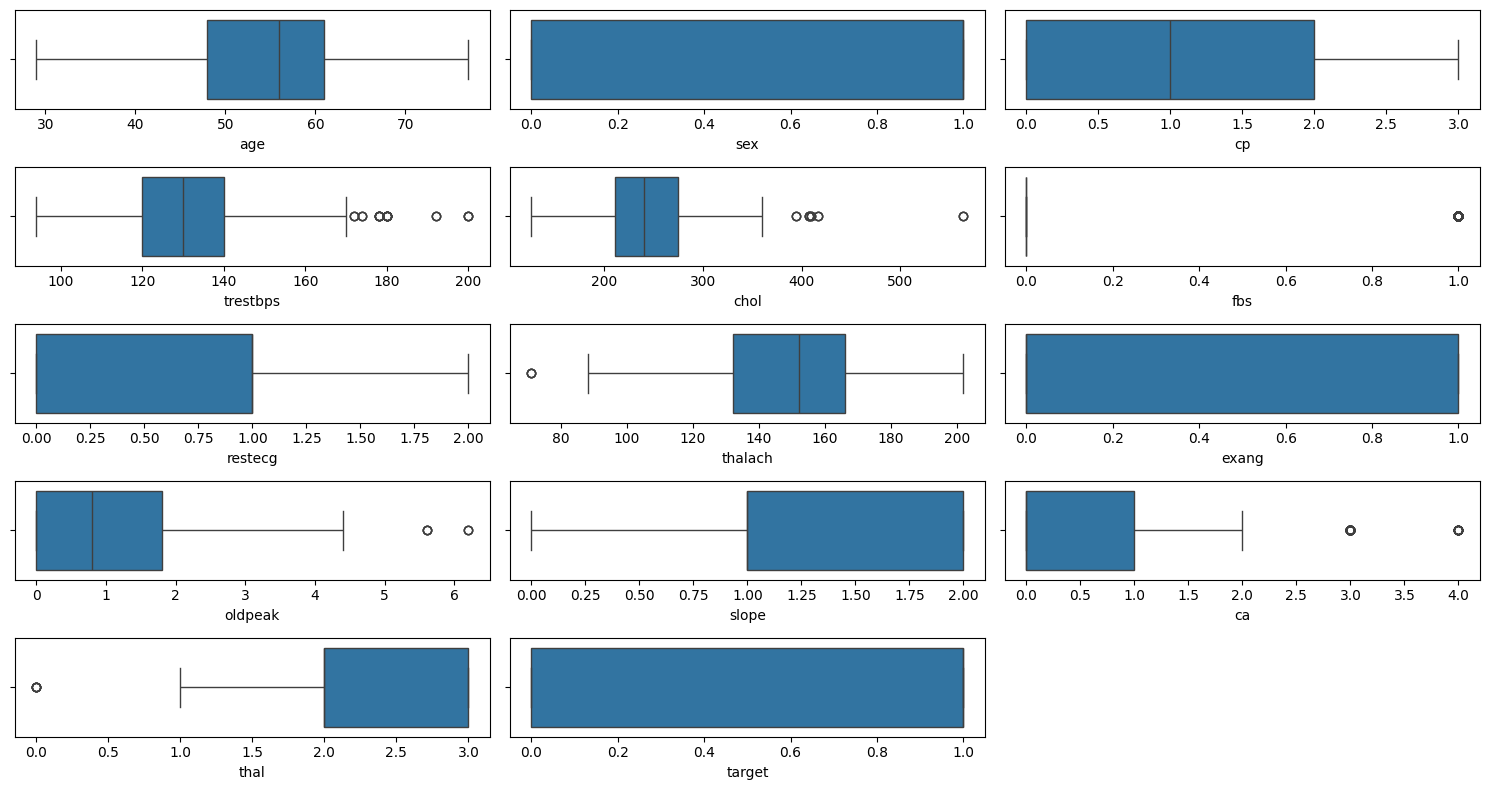

In [ ]:
figure = plt.figure(figsize=(15, 8))

for i, j in enumerate(cols):
    ax = plt.subplot(5,3,i+1)
    sns.boxplot(x = j, data = df)
plt.tight_layout()
plt.show()

In [ ]:
final_cols = df.nunique()[df.nunique().sort_values(ascending=True) > 5].index.to_list()
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
for col in final_cols:
    od = outlier_detector(df[col])
    print(f'{col} outliers: \n {od}')

age outliers: 
 []
trestbps outliers: 
 [192, 200, 192, 200, 192, 200, 200]
chol outliers: 
 [417, 564, 409, 564, 407, 564, 407, 409, 417, 407, 407, 417, 409]
thalach outliers: 
 [71, 71, 71, 71]
oldpeak outliers: 
 [5.6, 5.6, 6.2, 6.2, 6.2, 5.6, 5.6]


#### Replacing outlier values with median value of respective features

In [ ]:
for col in cols:
    od = outlier_detector(df[col])
    if len(od) > 0:
        fixed_val = np.median(df[col])
        od_in_col = [val for val in od if val in df[col].values]
        mask = df[col].isin(od_in_col)
        df.loc[mask,col] = fixed_val

In [ ]:
for col in final_cols:
    od = outlier_detector(df[col])
    print(f'{col} outliers: \n {od}')

age outliers: 
 []
trestbps outliers: 
 []
chol outliers: 
 [394, 394, 394]
thalach outliers: 
 []
oldpeak outliers: 
 [4.4, 4.4, 4.4, 4.4]


### Checking for Correlation & Feature Importance

<Axes: >

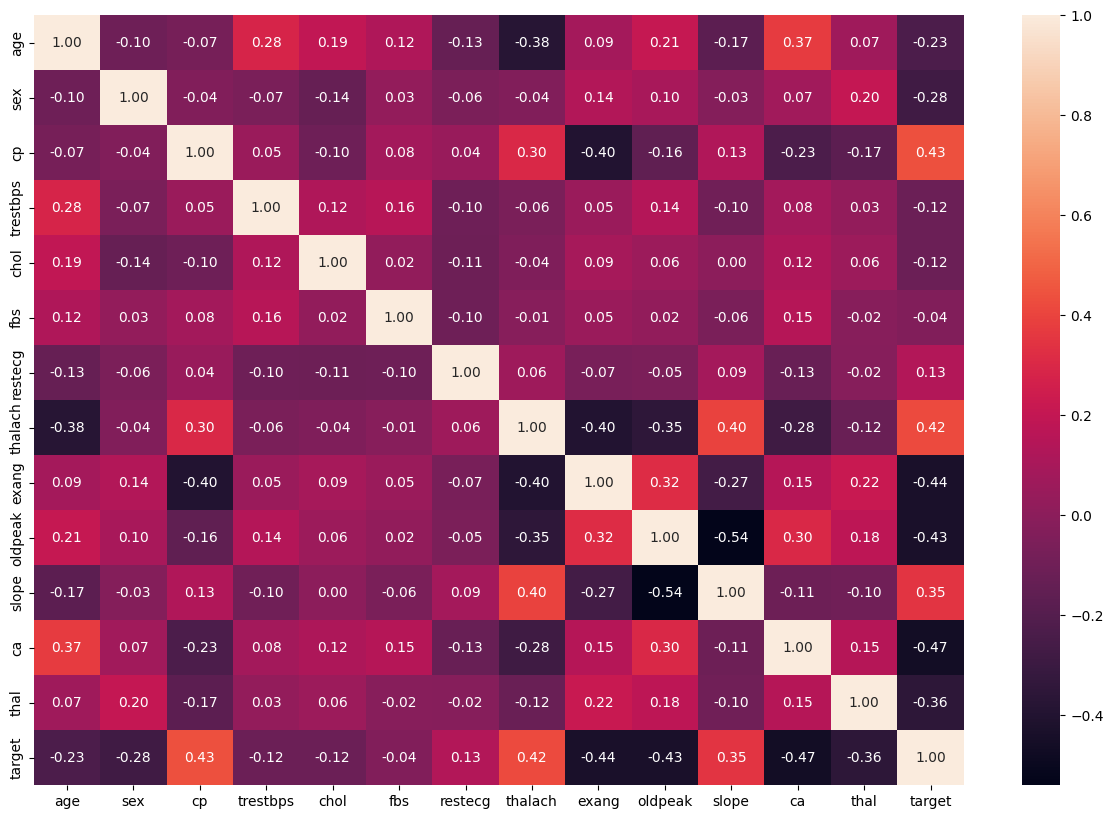

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot= True, fmt = '.2f')

> NO feature shows inherently high correlation with each other. Thus, we can proceed with the data as is

In [ ]:
extc = ExtraTreesClassifier()
extc.fit(df.drop(['target'],axis='columns'),df['target'])

ExtraTreesClassifier()

In [ ]:
pd.Series(extc.feature_importances_, index=df.drop(['target'],axis='columns').columns).sort_values(ascending=False)

ca          0.148172
thal        0.112842
cp          0.111754
exang       0.104082
thalach     0.082545
oldpeak     0.080935
age         0.072708
slope       0.062027
chol        0.060214
trestbps    0.058258
sex         0.053068
restecg     0.033255
fbs         0.020140
dtype: float64

## Model Selection

### Train & Test Data Setup

In [ ]:
X = df.drop(['target'], axis='columns')
y = df['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state=1)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(768, 13) (257, 13) (768,) (257,)


#### Setting up ROC curve function for subsequent plotting of AUC

In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
  plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

### Support Vector Classifier

In [ ]:
m1="SVC"
svc = SVC(probability=True)

In [ ]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.7520290732889159
Optimal threshold:  0.5819315410737342


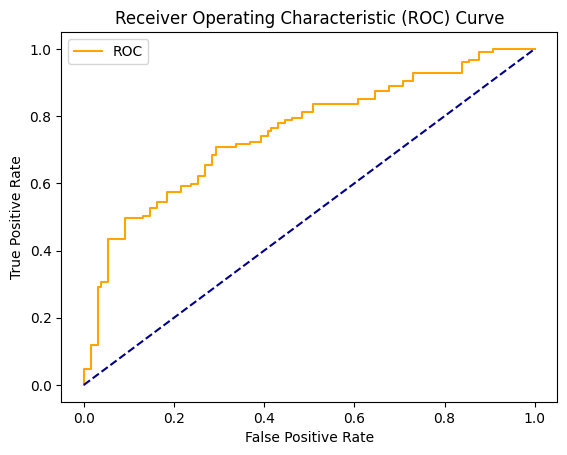

In [ ]:
y_true = y_test
y_score = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  65.759% 
 Classification report:
               precision    recall  f1-score   support

           0       0.72      0.52      0.61       130
           1       0.62      0.80      0.70       127

    accuracy                           0.66       257
   macro avg       0.67      0.66      0.65       257
weighted avg       0.67      0.66      0.65       257
 
 Confusion Matrix:
 [[ 68  62]
 [ 26 101]]


### Gaussian Naive Bayes

In [ ]:
m2 = "Gaussian NB"
gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.905511811023622
Optimal threshold:  0.6903318910834868


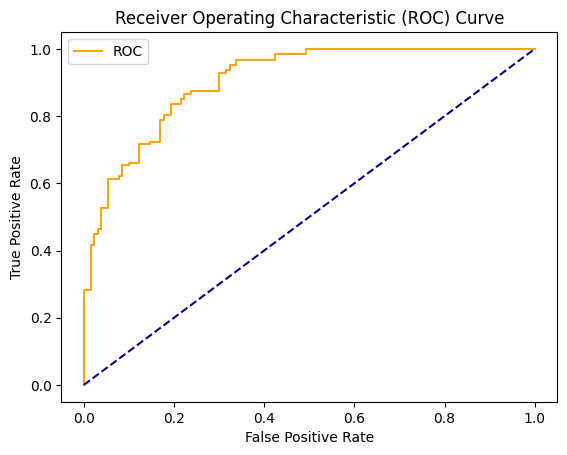

In [ ]:
y_true = y_test
y_score = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  78.988% 
 Classification report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       130
           1       0.74      0.88      0.81       127

    accuracy                           0.79       257
   macro avg       0.80      0.79      0.79       257
weighted avg       0.80      0.79      0.79       257
 
 Confusion Matrix:
 [[ 91  39]
 [ 15 112]]


### Logistic Regression

In [ ]:
m3 = "LogReg"
logreg = LogisticRegression(max_iter=2000)

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.9324651726226529
Optimal threshold:  0.7216606394434915


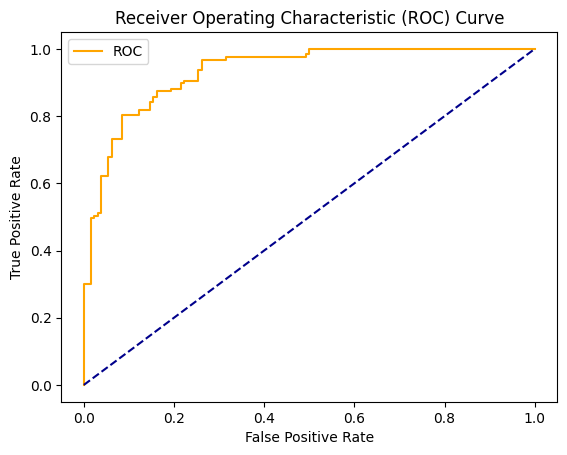

In [ ]:
y_true = y_test
y_score = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  82.490% 
 Classification report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81       130
           1       0.78      0.91      0.84       127

    accuracy                           0.82       257
   macro avg       0.83      0.83      0.82       257
weighted avg       0.83      0.82      0.82       257
 
 Confusion Matrix:
 [[ 97  33]
 [ 12 115]]


### KNeighborsClassifier

In [ ]:
m4 = "KN Classifier"
knc = KNeighborsClassifier()

In [ ]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knc.predict(X_test)
acc_knc = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.8820714718352514
Optimal threshold:  0.8


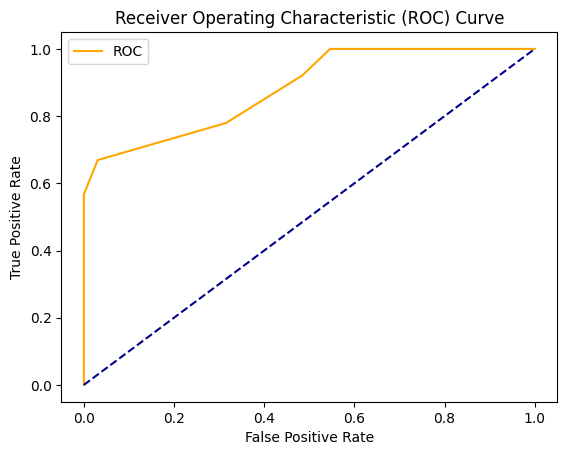

In [ ]:
y_true = y_test
y_score = knc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  73.152% 
 Classification report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       130
           1       0.71      0.78      0.74       127

    accuracy                           0.73       257
   macro avg       0.73      0.73      0.73       257
weighted avg       0.73      0.73      0.73       257
 
 Confusion Matrix:
 [[89 41]
 [28 99]]


### Random Forest

In [ ]:
m5 = "Random Forest"
rf = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=4,min_samples_split=7,n_jobs=-1)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=7,
                       n_estimators=30, n_jobs=-1)

In [ ]:
y_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.9614778921865536
Optimal threshold:  0.5252032784127416


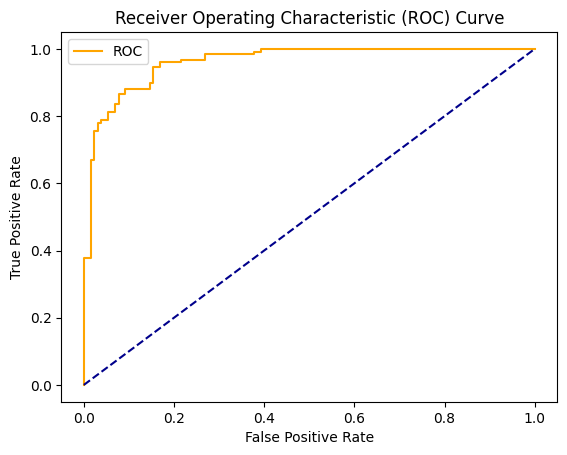

In [ ]:
y_true = y_test
y_score = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  87.938% 
 Classification report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       130
           1       0.82      0.96      0.89       127

    accuracy                           0.88       257
   macro avg       0.89      0.88      0.88       257
weighted avg       0.89      0.88      0.88       257
 
 Confusion Matrix:
 [[104  26]
 [  5 122]]


### Gradient Boost

In [ ]:
m6 = "Gradient Boost"
grb = GradientBoostingClassifier(loss='log_loss',learning_rate=0.01,n_estimators=30,max_depth=4,subsample=0.8)

In [ ]:
grb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=30,
                           subsample=0.8)

In [ ]:
y_pred = grb.predict(X_test)
acc_grb = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.9651120533010297
Optimal threshold:  0.5656351901564087


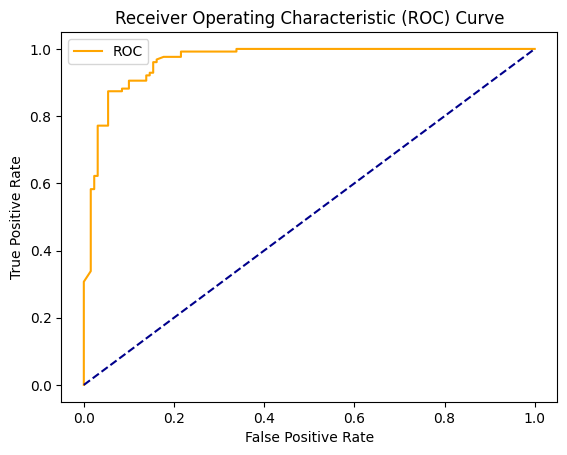

In [ ]:
y_true = y_test
y_score = grb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  88.716% 
 Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.88       130
           1       0.82      0.99      0.90       127

    accuracy                           0.89       257
   macro avg       0.90      0.89      0.89       257
weighted avg       0.91      0.89      0.89       257
 
 Confusion Matrix:
 [[102  28]
 [  1 126]]


### XG Boost

In [ ]:
m7 = "XGBoost"
xgb = XGBClassifier(learning_rate=0.01,n_estimators=25,max_depth=10,gamma=0.7,booster='dart',
                    reg_lambda=1,subsample=0.8)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test,y_pred) * 100

Area Under Curve: 0.9840702604482132
Optimal threshold:  0.5208363


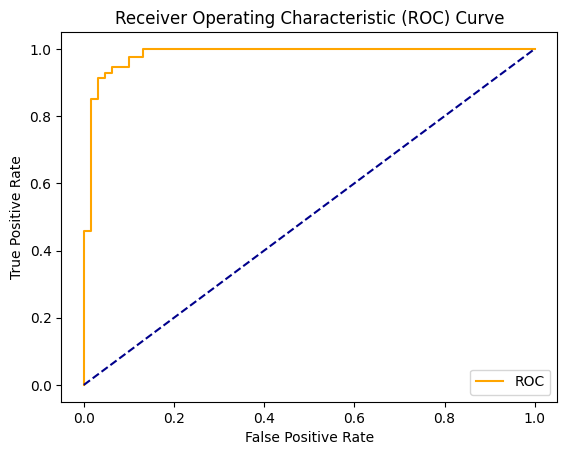

In [ ]:
y_true = y_test
y_score = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  93.385% 
 Classification report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       130
           1       0.88      1.00      0.94       127

    accuracy                           0.93       257
   macro avg       0.94      0.93      0.93       257
weighted avg       0.94      0.93      0.93       257
 
 Confusion Matrix:
 [[113  17]
 [  0 127]]


In [ ]:
results = pd.DataFrame({'Models': [m1, m2, m3, m4, m5, m6, m7],
                     'Accuracy': [acc_svc, acc_gnb, acc_logreg, acc_knc, acc_rf, acc_grb, acc_xgb]})

In [ ]:
results

,Models,Accuracy
0,SVC,65.758755
1,Gaussian NB,78.988327
2,LogReg,82.490272
3,KN Classifier,73.151751
4,Random Forest,87.937743
5,Gradient Boost,88.715953
6,XGBoost,93.385214


#### Conclusions:

1. `SVC`, `Gaussian NB` and `K-Neighbors Classifier` have performed poorly.(Accuracy < 80%)

2. `Logistic Regression`, `Random Forest`, `Gradient Boost` and `Extreme Gradient Boost` have shown to be potentially better models. Hence, we will proceed with the following 4 for *Model Optimisation*

## Model Optimisation

### Hyperparameter Tuning

In [ ]:
grid_logreg = {
    'max_iter': [5000,6000,8000],
    'C' : np.logspace(-4,1,4),
    'solver' : ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}

grid_rf = {
    'criterion': ['entropy','gini','log_loss'],
    'max_depth': [4,5],
    'n_estimators': [30,31],
    'max_leaf_nodes' : range(2,31,5),
    'min_samples_split': [10,12,13]
}

grid_grb = {
    'loss': ['log_loss','exponential'],
    'learning_rate': [0.0168,0.0174],
    'max_depth': [4,5],
    'min_samples_split': [10,12,13],
    'n_estimators':[32,33,34],
    'subsample' : [0.78,0.76,0.74],
}

grid_xgb = {
    'learning_rate': [0.017,0.019],
    'n_estimators': [30,35,38],
    'max_depth': [8,10],
    'gamma': [0.75, 0.73],
    'booster': ['dart'],
    'reg_lambda': [0.86],
    'subsample': [0.85,0.86],
    'colsample_bylevel': [0.5,0.6],
    'colsample_bynode' : [0.5,0.6]
}

In [ ]:
ht_logreg = LogisticRegression()
ht_rf = RandomForestClassifier()
ht_grb = GradientBoostingClassifier()
ht_xgb = XGBClassifier()

gs_logreg = GridSearchCV(estimator = ht_logreg,
                          param_grid = grid_logreg,
                          cv=10,
                          verbose = 1,
                          n_jobs = -1)

gs_rf = GridSearchCV(estimator = ht_rf,
                          param_grid = grid_rf,
                          cv=3,
                          verbose = 1,
                          n_jobs = -1)

gs_grb = GridSearchCV(estimator = ht_grb,
                          param_grid = grid_grb,
                          cv=3,
                          verbose = 1,
                          n_jobs = -1)

gs_xgb = GridSearchCV(estimator = ht_xgb,
                          param_grid = grid_xgb,
                          cv=3,
                          verbose = 1,
                          n_jobs = -1)

In [ ]:
gs_logreg.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 4.64158883e-03, 2.15443469e-01, 1.00000000e+01]),
                         'max_iter': [5000, 6000, 8000],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             verbose=1)

In [ ]:
gs_rf.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [4, 5], 'max_leaf_nodes': range(2, 31, 5),
                         'min_samples_split': [10, 12, 13],
                         'n_estimators': [30, 31]},
             verbose=1)

In [ ]:
gs_grb.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0168, 0.0174],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [4, 5], 'min_samples_split': [10, 12, 13],
                         'n_estimators': [32, 33, 34],
                         'subsample': [0.78, 0.76, 0.74]},
             verbose=1)

In [ ]:
gs_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['dart'], 'colsample_bylevel': [0.5, 0.6],
                         'colsample_bynode': [0.5, 0.6], 'gamma': [0.75, 0.73],
                         'learning_rate': [0.017, 0.019], 'max_depth': [8, 10],
                         'n_estimators': [30, 35, 38], 'reg_lambda': [0.86],
                         'subsample': [0.85, 0.86]},
             verbose=1)

In [ ]:
logreg_bs = gs_logreg.best_score_
grb_bs = gs_grb.best_score_
rf_bs = gs_rf.best_score_
xgb_bs = gs_xgb.best_score_

In [ ]:
final_score = pd.DataFrame({'Models' : [m3,m5,m6,m7],
                       'Scores': [logreg_bs*100,grb_bs*100,rf_bs*100,xgb_bs*100],
                       'Training Accuracy': [accuracy_score(y_train,gs_logreg.predict(X_train))*100,
                                             accuracy_score(y_train,gs_rf.predict(X_train))*100,
                                             accuracy_score(y_train,gs_grb.predict(X_train))*100,
                                             accuracy_score(y_train,gs_xgb.predict(X_train))*100],
                       'Test Accuracy' : [accuracy_score(y_test,gs_logreg.predict(X_test))*100,
                                          accuracy_score(y_test,gs_rf.predict(X_test))*100,
                                          accuracy_score(y_test,gs_grb.predict(X_test))*100,
                                          accuracy_score(y_test,gs_xgb.predict(X_test))*100]})

In [ ]:
final_score

,Models,Scores,Training Accuracy,Test Accuracy
0,LogReg,85.804853,85.677083,84.046693
1,Random Forest,92.447917,92.187500,89.105058
2,Gradient Boost,90.755208,97.656250,95.330739
3,XGBoost,91.015625,97.135417,95.330739


### Conclusions:

1. `Logistic Regression` and `Random Forest`, despite optimisation, have not been performed adequately with Testing Data.

2. `XGBoost` and `Gradient Boost` have performed equally well with Test Data.

3. `Gradient Boost` may be marginally more *overfitted* than the `XGBoost` model. Additionally, the latter has better *validation score* than the former.

Therefore, the `XGBoost` will be considered as the best model for the data.

## Fitting the best model to the Data

In [ ]:
bp = gs_xgb.best_params_
bp

{'booster': 'dart',
 'colsample_bylevel': 0.6,
 'colsample_bynode': 0.5,
 'gamma': 0.75,
 'learning_rate': 0.019,
 'max_depth': 8,
 'n_estimators': 38,
 'reg_lambda': 0.86,
 'subsample': 0.85}

In [ ]:
model = XGBClassifier(booster = bp['booster'],
                      colsample_bylevel = bp['colsample_bylevel'],
                      colsample_bynode = bp['colsample_bynode'],
                      gamma = bp['gamma'],
                      learning_rate = bp['learning_rate'],
                      max_depth = bp['max_depth'],
                      n_estimators = bp['n_estimators'],
                      reg_lambda = bp['reg_lambda'],
                      subsample = bp['subsample'])
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.75, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.019, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=38, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

Area Under Curve: 0.9877649909145971
Optimal threshold:  0.53622586


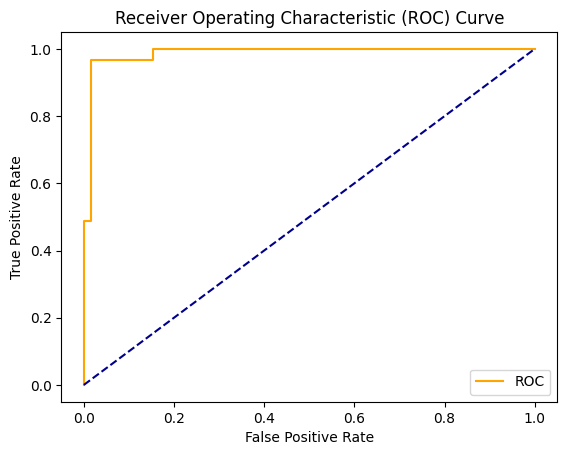

In [ ]:
y_true = y_test
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
print(f'Area Under Curve: {metrics.roc_auc_score(y_true, y_score)}')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold: ", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test,y_pred) * 100: .3f}% \n Classification report:\n {classification_report(y_test, y_pred, zero_division = 0)} \n Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}')

Accuracy:  95.331% 
 Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       130
           1       0.94      0.97      0.95       127

    accuracy                           0.95       257
   macro avg       0.95      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257
 
 Confusion Matrix:
 [[122   8]
 [  4 123]]


<Figure size 4000x6000 with 0 Axes>

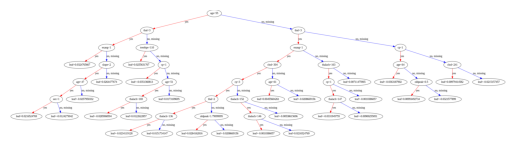

In [ ]:
plt.figure(figsize=(20,30), dpi=200)
plot_tree(model=model, booster = model.get_booster())
plt.show()

***********************************************************************